# K-nearest neighbors

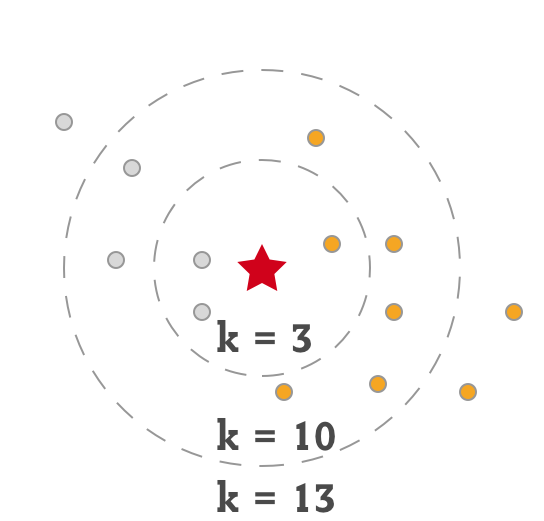

In [65]:
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
sns.set()

In [66]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [71]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)
  
  def _predict(self, x):

    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    k_indices = np.argsort(distances)[:self.k]

    k_nearest_label = [self.y_train[i] for i in k_indices]

    most_common = Counter(k_nearest_label).most_common(1)
    return most_common[0][0]

In [68]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1 2 2 0 2 0 1 2 2 1 1 2 2 1 1 0 1 1 2 1 1 0 2 2 2 0 2 1 0 2 2 2 0 2 1 2 1
 1 2 0 2 2 0 1 2]
